In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
import seaborn as sns

<AxesSubplot: xlabel='Height', ylabel='Count'>

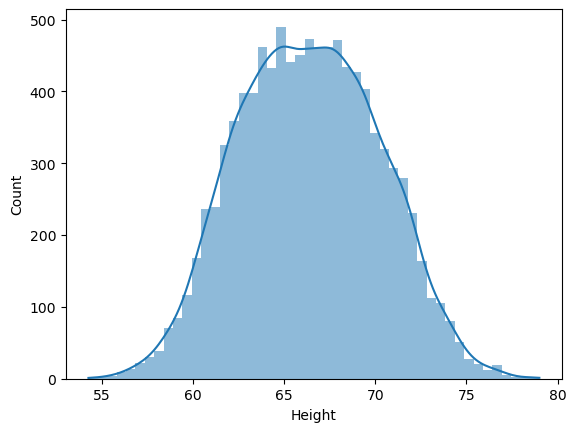

In [7]:
sns.histplot(df['Height'],kde=True,lw=0)

<AxesSubplot: >

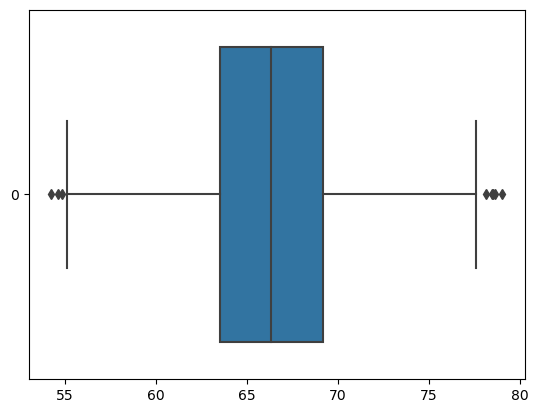

In [8]:
# outliers are present
sns.boxplot(df['Height'],orient='h')

In [21]:
# defining custom limits
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

upper_limit,lower_limit

(74.78571507648495, 58.134495462372655)

In [22]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [23]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

In [13]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot: xlabel='Height', ylabel='Count'>

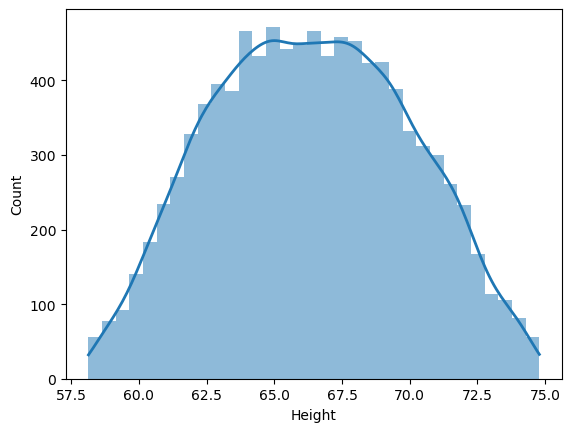

In [28]:
sns.histplot(new_df['Height'],kde=True,lw=0,line_kws={"linewidth":2})

<AxesSubplot: >

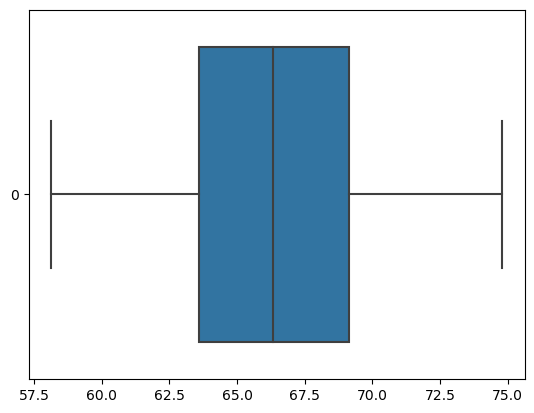

In [29]:
# Outliers removed
sns.boxplot(new_df['Height'],orient='h')

### Capping/Winsorization

In [16]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [17]:
df.shape

(10000, 3)

In [18]:
# max and min capped
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<AxesSubplot: xlabel='Height', ylabel='Count'>

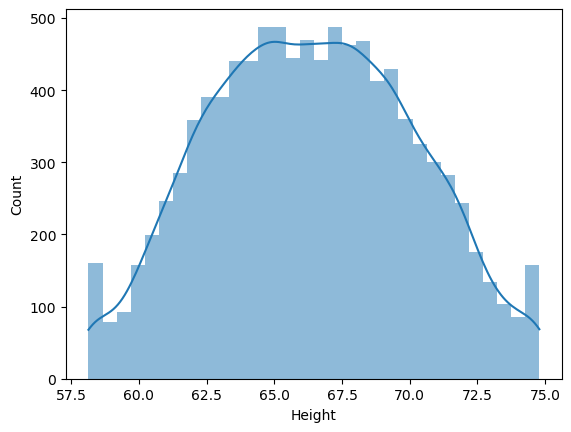

In [19]:
sns.histplot(df['Height'],kde=True,lw=0)

<AxesSubplot: >

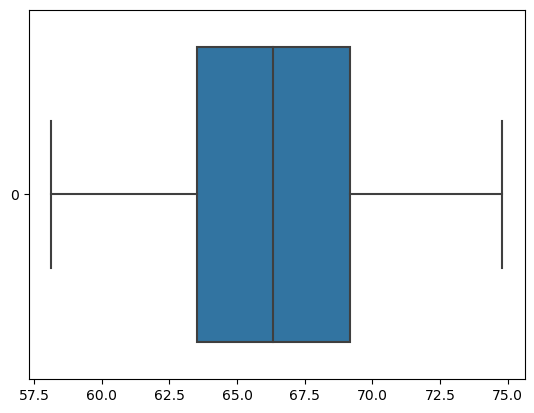

In [30]:
sns.boxplot(df['Height'],orient='h')